# Grupowanie

Autor sekcji: {ref}`authors:filip-wojcik`.

W poniższej sekcji przyjrzymy się dokładnie zadaniu, jakim jest grupowanie i jego metryki.


```{glossary}
Grupowanie
    Grupowanie (zwane także klasteryzacją) (ang. clustering) jest techniką stosowaną w uczeniu maszynowym do odkrywania wewnętrznych struktur w danych poprzez ich organizowanie w grupy, zwane klastrami (clusters). Klasteryzacja ma na celu takie pogrupowanie danych, aby elementy znajdujące się w jednym klastrze były bardziej do siebie podobne niż elementy w innych klastrach. Ujmując to inaczej: w efekcie grupowania chcemy **aby różnice międzygrupowe były większe niż wewnątrzgrupowe**. Grupowanie jest powszechnie używane w eksploracji danych, segmentacji klientów, analityce obrazu czy rozpoznawaniu wzorców. Ze względu na brak etykiet kategorii, zaliczamy je do **uczenia nienadzorowanego** / **uczenia bez nadzoru** (ang. *unsupervised learning*). {cite:ps}`sammut2017encyclopedia`
```

# Grupowanie - definicja formalna

Poniżej znajdziemy ogólną, formalną definicję procesu grupowania danych numerycznych. Dla danych o charakterze mieszanym (np. tekstowym, dyskretnym i numerycznym) proces ma nieco inny charakter, który omówimy w dalszej części rozdziału.



Załóżmy, że mamy zbiór danych $X = \{ \mathbf{x}_1, \mathbf{x}_2, \dots, \mathbf{x}_n \}$, gdzie każda obserwacja $ \mathbf{x}_i \in \mathbb{R}^d $ to punkt w przestrzeni $ d $-wymiarowej (cechy lub atrybuty danych). Celem grupowania jest znalezienie podziału zbioru danych $ X $ na $ k $ grup, takich że:

$
X = C_1 \cup C_2 \cup \dots \cup C_k \quad \text{oraz} \quad C_i \cap C_j = \emptyset \quad \text{dla} \quad i \neq j,
$

gdzie $ C_1, C_2, \dots, C_k $ to klastry (grupy).

## Funkcja celu

Podstawowym celem grupowania jest minimalizacja różnorodności wewnątrz klastrów, przy jednoczesnej maksymalizacji różnorodności między klastrami. W wielu metodach grupowania, takich jak $ k $-średnich (ang. *k-means*), używa się następującej funkcji celu {cite:ps}`jain2010data`:

$
J = \sum_{i=1}^{k} \sum_{\mathbf{x} \in C_i} \| \mathbf{x} - \mu_i \|^2,
$

gdzie:
- $ \mu_i $ to centroid (środek ciężkości) klastra $ C_i $, dany wzorem:

$
\mu_i = \frac{1}{|C_i|} \sum_{\mathbf{x} \in C_i} \mathbf{x},
$

- $ \| \mathbf{x} - \mu_i \|^2 $ to kwadrat odległości euklidesowej między punktem danych $ \mathbf{x} $ a centroidem $ \mu_i $,
- $ J $ to suma kwadratów błędów (ang. *sum of squared errors*, SSE), która opisuje wewnętrzne rozproszenie klastrów.


# Metryki oceny grupowania

Do oceny jakości grupowania używa się różnych metryk, takich jak:

## SSE

**SSE (ang. Sum of Squared Errors)** – minimalizowana przez algorytm $ k $-średnich, jest to suma kwadratów odległości między punktami danych a odpowiadającymi im centroidami:
   $
   SSE = \sum_{i=1}^{k} \sum_{\mathbf{x} \in C_i} \| \mathbf{x} - \mu_i \|^2.
   $

## Współczynnik sylwetkowy

**Współczynnik sylwetkowy (ang. Silhouette Score)** – mierzy, jak dobrze punkty danych pasują do swojego klastra w porównaniu z innymi klastrami. Dla punktu $ \mathbf{x}_i $ współczynnik silhouette jest definiowany jako {cite:ps}`rousseeuw1987silhouettes`:
   $
   s(\mathbf{x}_i) = \frac{b(\mathbf{x}_i) - a(\mathbf{x}_i)}{\max(a(\mathbf{x}_i), b(\mathbf{x}_i))},
   $
   gdzie:
   - $ a(\mathbf{x}_i) $ to średnia odległość między $ \mathbf{x}_i $ a wszystkimi innymi punktami w jego klastrze,
   - $ b(\mathbf{x}_i) $ to minimalna średnia odległość między $ \mathbf{x}_i $ a punktami w najbliższym klastrze.

## Indeks Kalinskiego-Harabasza

**Indeks Kalinskiego-Harabasza (ang. Calinski-Harabasz Index)** - jest jedną z popularnych metryk oceny jakości grupowania. Mierzy on stosunek między rozproszeniem wewnątrz klastrów a rozproszeniem między klastrami. Wyższa wartość indeksu wskazuje na lepsze grupowanie, ponieważ oznacza to, że klastry są bardziej zwarte (punkty wewnątrz każdego klastra są blisko siebie) i jednocześnie dobrze rozdzielone (centroidy klastrów są od siebie oddalone). Indeks Kalinskiego-Harabasza jest definiowany następująco {cite:ps}`calinski1974dendrite`:

$
CH = \frac{ \text{trace}(B_k) }{ \text{trace}(W_k) } \cdot \frac{n - k}{k - 1},
$

gdzie:
- $ n $ to liczba wszystkich punktów danych,
- $ k $ to liczba klastrów,
- $ \text{trace}(B_k) $ to ślad macierzy rozproszenia między klastrami (miara różnorodności między klastrami),
- $ \text{trace}(W_k) $ to ślad macierzy rozproszenia wewnątrz klastrów (miara różnorodności wewnątrz klastrów).

### Składowe indeksu

Dwiema ważnymi składowymi tego indeksu są:

1. **Macierz rozproszenia między klastrami** mierzy jak bardzo centroidy poszczególnych klastrów są oddalone od centrum całego zbioru danych. Formalnie {cite:ps}`Lam2014`:

   $
   B_k = \sum_{i=1}^{k} |C_i| (\mu_i - \mu_X)(\mu_i - \mu_X)^T,
   $

   gdzie:
   - $ |C_i| $ to liczba punktów w klastrze $ C_i $,
   - $ \mu_i $ to centroid klastra $ C_i $,
   - $ \mu_X $ to centroid całego zbioru danych (średnia globalna).

   Macierz ta mierzy, jak bardzo centroidy poszczególnych klastrów są oddalone od centroidu całego zbioru danych.

2. **Macierz rozproszenia wewnątrz klastrów** - mierzy średnie rozproszenie wewnątrz poszczególnych grup {cite:ps}`Lam2014`}:

   $
   W_k = \sum_{i=1}^{k} \sum_{\mathbf{x} \in C_i} (\mathbf{x} - \mu_i)(\mathbf{x} - \mu_i)^T.
   $

   Macierz ta mierzy, jak bardzo punkty wewnątrz każdego klastra są rozproszone wokół własnych centroidów.

### Interpretacja indeksu

Im większa wartość indeksu Kalinskiego-Harabasza, tym lepsza jakość grupowania, ponieważ wskazuje na:
- Małe rozproszenie punktów danych wewnątrz każdego klastra (grupy są zwarte),
- Duże rozproszenie między klastrami (grupy są dobrze oddzielone).

Wysoka wartość $ CH $ oznacza, że algorytm grupowania skutecznie podzielił dane na dobrze odseparowane klastry o spójnym wewnętrznym układzie.

# Grupowanie metodą K-średnich (ang. *K-means*)

Jednym z najpopularniejszych algorytmów klasteryzacji jest **K-Means**. K-Means stara się podzielić zbiór danych na k klastrów, minimalizując sumę kwadratów odległości punktów od środków klastrów (centroidów).

Jego działanie można opisać w następujących krokach

```
1. Wybierz k losowych punktów jako centroidy początkowe.
2. Przypisz każdy punkt do najbliższego centroidu.
3. Powtarzaj aż do osiągnięcia zbieżności (brak zmian położenia centroidów) lub przez określoną licznbę iteracji:
    1. Zaktualizuj położenie centroidów, obliczając średnią z przypisanych do nich punktów.
    2. Przypisz każdy punkt do najbliższego centroidu.

Poniższy fragment kodu pokazuje przykład zastosowania algorytmu K-Means w bibliotece scikit-learn.

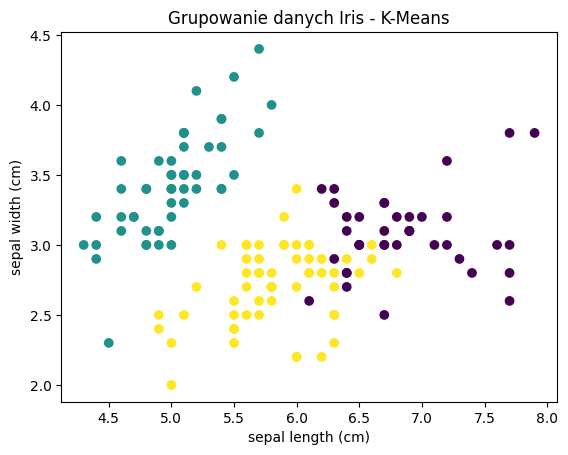

In [3]:
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import pandas as pd

# Wczytanie zbioru danych Iris
iris = load_iris()
data = iris.data

# Utworzenie i dopasowanie modelu K-Means: max. 3 centroidy
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(data)

# Wizualizacja wyników grupowania
labels = kmeans.labels_
df = pd.DataFrame(data, columns=iris.feature_names)
df['Cluster'] = labels

# Wizualizacja na płaszczyźnie w 2 wymiarach - wykorzystamy tylko 2 atrybuty numeryczne.
# W normalnych warunkach, wykorzystuje się algorytmy redukcji wymiarów, np. PCA, aby zachować
# zależności między atrybutami, a jednoczśnie móc je pokazać na płaszczyźnie lub w przestrzeni 3D.
plt.scatter(df.iloc[:, 0], df.iloc[:, 1], c=labels, cmap='viridis')
plt.xlabel(iris.feature_names[0])
plt.ylabel(iris.feature_names[1])
plt.title("Grupowanie danych Iris - K-Means")
plt.show()

W powyższym przykładzie dane Iris są grupowane na trzy klastry, odpowiadające trzem gatunkom kwiatów. Każdy klaster jest reprezentowany przez inny kolor na wykresie, co pozwala wizualnie zobaczyć podział danych. Kolorowe regiony odpowiadają obszarom, w których dany klaster jest dominujący — każdy punkt w tym regionie jest przypisany do najbliższego centroidu tego klastra. Choć K-Means nie zna etykiet klas, dobrze radzi sobie z podziałem danych na naturalnie wyłaniające się grupy.

# Oprócz algorytmu K-Means, istnieje wiele innych metod klasteryzacji, które mogą być stosowane w zależności od charakterystyki danych i wymagań użytkownika. Oto kilka z nich:

**1. DBSCAN (ang. *Density-Based Spatial Clustering of Applications with Noise*)**

DBSCAN to algorytm oparty na gęstości, który grupuje punkty znajdujące się blisko siebie i może identyfikować obszary o większej gęstości jako klastry, ignorując punkty, które są rozproszone (tzw. szum). Jest szczególnie przydatny w przypadku danych o nieregularnych kształtach, gdzie K-Means może zawodzić.

**2. Mean Shift**

Mean Shift to metoda klasteryzacji, która nie wymaga podania liczby klastrów z góry. Działa poprzez przesuwanie centroidów w kierunku obszarów o większej gęstości, aż do osiągnięcia zbieżności. Jest bardzo skuteczna w sytuacjach, gdy struktura danych nie jest jednoznaczna.

**3. Hierarchiczna Klasteryzacja (ang. *Hierarchical Clustering*)**

Hierarchiczna klasteryzacja tworzy strukturę drzewiastą (dendrogram), która pokazuje relacje między punktami danych na różnych poziomach grupowania. Proces może być aglomeracyjny (łączenie klastrów) lub dywizyjny (dzielenie klastrów).

**4. Klasteryzacja Gowera i K-Prototypów (ang. *K-Prototypes*)**

W przypadku danych o zróżnicowanym charakterze, które zawierają zarówno cechy dyskretne, jak i numeryczne, stosuje się specjalne techniki klasteryzacji. Przykładem jest zastosowanie miary odległości Gowera (Gower Distance), która umożliwia jednoczesne uwzględnienie cech numerycznych i kategorycznych. Metoda K-Prototypes łączy podejścia K-Means i K-Modes, aby efektywnie grupować dane mieszane.


Poszczególne metody zostaną omówione w dalszej części niniejszego opracowania, w rozdziałach poświęconym konkretnym metodom.